<a href="https://colab.research.google.com/github/barrosm/BIMASTER_CODE_PUBLIC/blob/main/003_leitura_dados_diarios_cvm_parte_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura de dados diários de fundos de investimentos

### Data: 13/02/2020 - última revisão 15/05/2021

Mês início = 03/2020
Mês final = 02/2021

In [22]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

import seaborn as sns; 
sns.set(rc={'figure.figsize':(17,6)})
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

import os
current_dir = os.getcwd()
current_dir

from time import perf_counter
import pickle

In [23]:
os.chdir('..')  # vai um nível para cima
current_dir = os.getcwd()
current_dir

path = current_dir + 'CVM/Diario/' #Linux
#path = current_dir + '\\CVM\\Diario\\'  #Windows
os.makedirs(path, exist_ok = 'TRUE')

In [24]:
# REMOTE PATH
remote_path = '/home/jupyter/Notebooks/monica/@Fund_Eval/CVM/Diario/'
os.makedirs(remote_path, exist_ok = 'TRUE')

In [25]:
path

'/CVM/Diario/'

In [26]:
url_address = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_'

In [27]:
ct = ['202003', '202004', '202005', '202006' , '202007', '202008', '202009', '202010', '202011', '202012', '202101', '202102']

In [28]:
start_month = ct[0]
end_month = ct[-1]

In [29]:
filename = 'df_diario_'+start_month+'_'+end_month+'.pkl'

In [30]:
arq_names = [url_address + i + '.csv' for i in ct]

In [31]:
arq_names[-5:]   #Últimos 5 meses

['http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202010.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202011.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202012.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202101.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202102.csv']

In [32]:
# Número de arquivos (meses) lidos 
len(arq_names)

12

In [33]:
# Cria dataframe vazia
df = pd.DataFrame()

## Leitura dos arquivos e concatenação num único dataframe - o índice é o CNPJ

In [34]:
%time
time_start = perf_counter()
df = pd.concat((pd.read_csv(f, sep = ';', index_col=0) for f in arq_names))
time_end = perf_counter()
elapsed_time = time_end - time_start

print(' **** a leitura dos dados demorou ', round(elapsed_time,2) , ' segundos *****')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 9.78 µs
 **** a leitura dos dados demorou  131.69  segundos *****


In [35]:
#df.head(3)
#df.tail(3)

In [36]:
df = df.reset_index() # Do not do it until you want to group by cnpj
df.head(3)

,index,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,CNPJ_FUNDO
0,00.017.024/0001-53,2020-03-02,1127645.45,27.307906,1121177.36,0.0,0.0,1,NaN
1,00.017.024/0001-53,2020-03-03,1127821.65,27.311429,1121321.98,0.0,0.0,1,NaN
2,00.017.024/0001-53,2020-03-04,1128000.73,27.314885,1121463.91,0.0,0.0,1,NaN


## Salva dataframe com todos os dados diários em arquivo pkl

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559970 entries, 0 to 4559969
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   index          object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   CNPJ_FUNDO     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 313.1+ MB


In [38]:
time_start = perf_counter()

df.to_pickle(path+filename) # changed to remote path
#df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  1.5  segundos *****


## Cálculo do Retorno diário

In [39]:
df["Return"] = df.groupby("CNPJ_FUNDO")["VL_QUOTA"].pct_change(1)*100.0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559970 entries, 0 to 4559969
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   index          object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   CNPJ_FUNDO     object 
 9   Return         float64
dtypes: float64(6), int64(1), object(3)
memory usage: 347.9+ MB


In [41]:
# se deu encrenca e o kernel morreu, reler df = pd.read_pickle(path+filename)

In [42]:
time_start = perf_counter()

df.to_pickle(remote_path+filename) # changed to remote path
#df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  1.71  segundos *****


In [43]:
df[['DT_COMPTC', 'VL_QUOTA', 'Return']][df['CNPJ_FUNDO']=='97.929.213/0001-34']

,DT_COMPTC,VL_QUOTA,Return
725450,2020-04-01,7.851832,NaN
725451,2020-04-02,7.889501,0.479747
725452,2020-04-03,7.850798,-0.490561
725453,2020-04-06,7.979766,1.642734
725454,2020-04-07,8.009091,0.367491
...,...,...,...
4559965,2021-02-22,9.531573,-0.670181
4559966,2021-02-23,9.515166,-0.172137
4559967,2021-02-24,9.515177,0.000119
4559968,2021-02-25,9.440641,-0.783335


In [44]:
# Example - return of a randomly chosen fund

#numpy.random.randint(low, high=None, size=None, dtype='l')
random_row = np.random.randint(0,len(df))
random_cnpj = df['CNPJ_FUNDO'].iloc[random_row,]
random_cnpj

'22.415.840/0001-58'

In [45]:
df_to_plot = df[['CNPJ_FUNDO','DT_COMPTC','Return']].copy()


In [46]:
df_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559970 entries, 0 to 4559969
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CNPJ_FUNDO  object 
 1   DT_COMPTC   object 
 2   Return      float64
dtypes: float64(1), object(2)
memory usage: 104.4+ MB


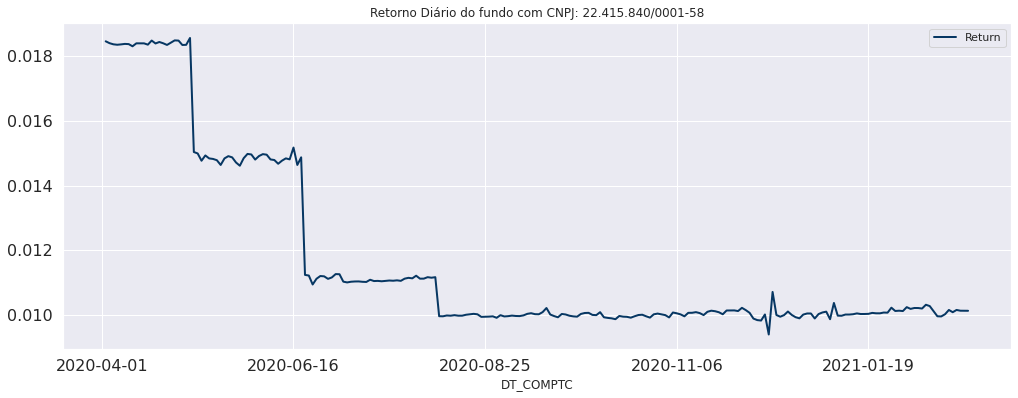

In [47]:
sns.set(rc={'figure.figsize':(17,6)})
df_to_plot[['DT_COMPTC','Return']][df_to_plot['CNPJ_FUNDO']==random_cnpj].set_index('DT_COMPTC').plot(title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                                                                     fontsize = 16, linewidth = 2.0, color = '#073763');

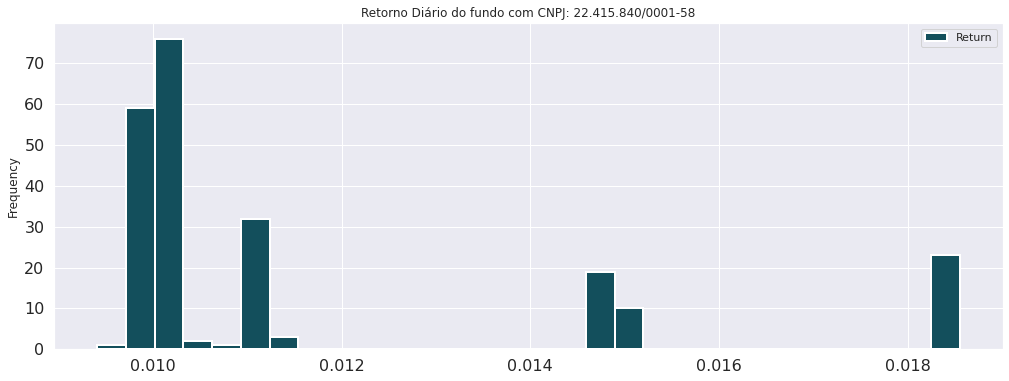

In [48]:
sns.set(rc={'figure.figsize':(17,6)})
df[['Return']][df['CNPJ_FUNDO']==random_cnpj].plot.hist(bins = 30, title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                        fontsize = 16, linewidth = 2.0, color = '#134f5c')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559970 entries, 0 to 4559969
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   index          object 
 1   DT_COMPTC      object 
 2   VL_TOTAL       float64
 3   VL_QUOTA       float64
 4   VL_PATRIM_LIQ  float64
 5   CAPTC_DIA      float64
 6   RESG_DIA       float64
 7   NR_COTST       int64  
 8   CNPJ_FUNDO     object 
 9   Return         float64
dtypes: float64(6), int64(1), object(3)
memory usage: 347.9+ MB


In [50]:
# Show days where return below 1% for randomly selected fund

df[['DT_COMPTC','Return']][(df['CNPJ_FUNDO']==random_cnpj )& (df['Return'] < -1)].set_index('DT_COMPTC')

,Return
DT_COMPTC,


## Salva dataframe incluindo retornos diários em arquivo csv

In [52]:
time_start = perf_counter()
df.to_csv('df_diario_'+str(ct[0])+'_'+str(ct[-1])+'.csv',sep = ';' ,encoding='utf-8')#, compression = 'zip')

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .csv demorou  44.58  segundos *****


In [54]:
!ls -

df_diario_202003_202102.csv  CVM      lib64  sbin		var
.			     datalab  media  srv		dev
..			     etc      mnt    tensorflow-1.15.2	.dockerenv
bin			     home     opt    tmp		proc
boot			     lib      root   tools		sys
content			     lib32    run    usr
